In [36]:
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
image_directory = '/content/drive/MyDrive/Skin_Conditions/'
SIZE = 224
dataset, label = [], []

categories = ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea']

for idx, category in enumerate(categories):
    path = os.path.join(image_directory, category)
    for image_name in os.listdir(path):
        if image_name.lower().endswith('.jpg'):
            image = cv2.imread(os.path.join(path, image_name))
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = Image.fromarray(image).resize((SIZE, SIZE))
                dataset.append(np.array(image))
                label.append(idx)

dataset = np.array(dataset)
labels = np.array(label)

print(f"Dataset shape: {dataset.shape}")
print(f"Labels shape: {labels.shape}")

Dataset shape: (2414, 224, 224, 3)
Labels shape: (2414,)


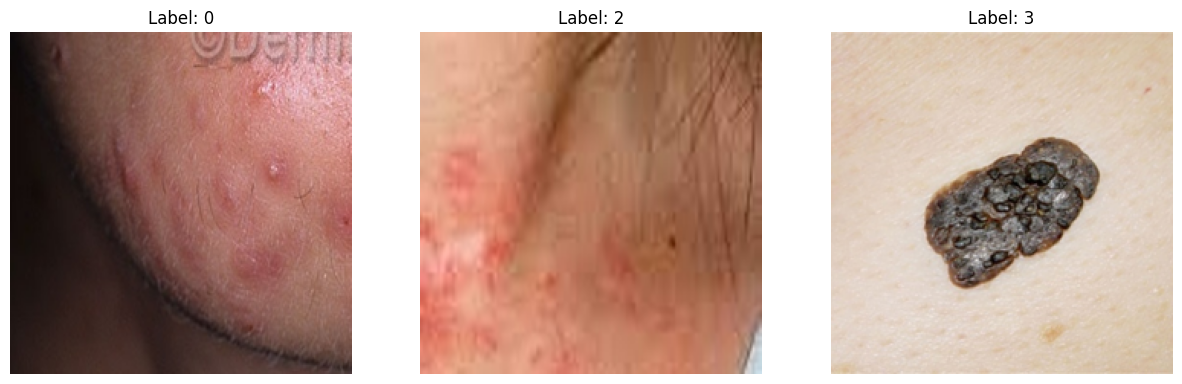

In [3]:
# Set up the figure and the subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop to display 3 random images
for i in range(3):
    num = random.randint(0, len(dataset) - 1)

    # Display the image in the corresponding subplot
    axs[i].imshow(np.reshape(dataset[num], (224, 224, 3)))

    # Set the title to show the label for this image
    axs[i].set_title(f"Label: {labels[num]}")

    # Remove the axes ticks for a cleaner look
    axs[i].axis('off')

# Show the plot
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, labels, test_size=0.20, random_state=42
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1931, 224, 224, 3)
Test data shape: (483, 224, 224, 3)


In [6]:
X_train = X_train/255
X_test = X_test/ 255

print(y_train[5])
print(y_train[15])
print(y_train[7])
print(y_train[55])

2
0
3
2


In [7]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat[5])
print(y_train_cat[15])
print(y_train_cat[7])
print(y_train_cat[55])

[0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]


In [27]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base.trainable = False

x = resnet_base.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(categories), activation='softmax')(x)

resnet_model = Model(inputs=resnet_base.input, outputs=predictions)

resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = resnet_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.1)



Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.1628 - loss: 2.0414 - val_accuracy: 0.1495 - val_loss: 1.8026
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.1531 - loss: 1.7988 - val_accuracy: 0.1649 - val_loss: 1.7951
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.1633 - loss: 1.7927 - val_accuracy: 0.1598 - val_loss: 1.7906
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.1658 - loss: 1.7885 - val_accuracy: 0.1701 - val_loss: 1.7855
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1902 - loss: 1.7882 - val_accuracy: 0.1392 - val_loss: 1.7879
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.1926 - loss: 1.7851 - val_accuracy: 0.1804 - val_loss: 1.7826
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.1903 - loss: 1.7828 - val_accuracy: 0.2062 - val_loss: 1.7762
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.2216 - loss: 1.7801 - v

In [28]:
y_pred_resnet = np.argmax(resnet_model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)  # convert back to integers for classification report
print(classification_report(y_test_labels, y_pred_resnet, target_names=categories))

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step
              precision    recall  f1-score   support

        Acne       0.31      0.87      0.46        78
   Carcinoma       0.00      0.00      0.00        88
      Eczema       0.24      0.17      0.20        63
   Keratosis       0.38      0.87      0.53        90
       Milia       0.67      0.06      0.12        93
     Rosacea       1.00      0.07      0.13        71

    accuracy                           0.35       483
   macro avg       0.43      0.34      0.24       483
weighted avg       0.43      0.35      0.24       483



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.metrics import accuracy_score

accuracy_resnet = accuracy_score(y_test, y_pred_resnet)
print(f"ResNet50 Accuracy: {accuracy_resnet * 100:.2f}%")


ResNet50 Accuracy: 34.78%


<Figure size 1000x800 with 0 Axes>

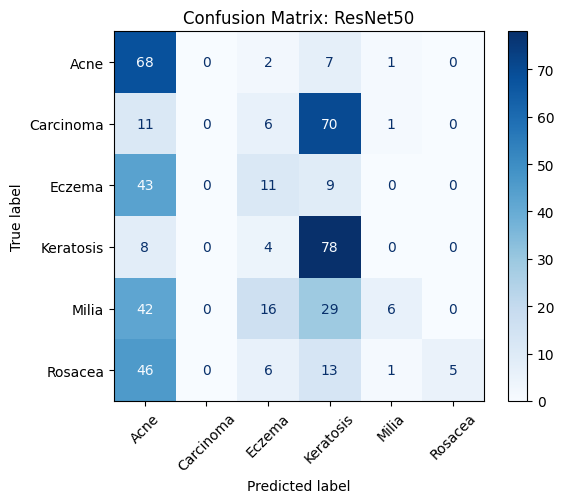

In [30]:
# Compute confusion matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix: ResNet50')
plt.show()



In [12]:
# Step 2: Load VGG19 base model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19_base.trainable = False  # Freeze base layers

# Step 3: Add custom layers
x = vgg19_base.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(categories), activation='softmax')(x)

vgg19_model = Model(inputs=vgg19_base.input, outputs=predictions)

# Step 4: Compile with categorical loss
vgg19_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Step 5: Train with one-hot encoded labels
history_vgg19 = vgg19_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.1)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 36s 244ms/step - accuracy: 0.1820 - loss: 1.9050 - val_accuracy: 0.1701 - val_loss: 1.8131
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.1941 - loss: 1.8062 - val_accuracy: 0.2371 - val_loss: 1.7720
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.2654 - loss: 1.7604 - val_accuracy: 0.2835 - val_loss: 1.7538
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.3164 - loss: 1.7450 - val_accuracy: 0.2938 - val_loss: 1.7402
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.3612 - loss: 1.7293 - val_accuracy: 0.3196 - val_loss: 1.7268
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.3723 - loss: 1.7155 - val_accuracy: 0.3660 - val_loss: 1.7120
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.4285 - loss: 1.6904 - val_accuracy: 0.3711 - val_loss: 1.7001
Epoch 8/50
109/109 ━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step
              precision    recall  f1-score   support

        Acne       0.46      0.67      0.54        78
   Carcinoma       0.46      0.47      0.46        88
      Eczema       0.41      0.52      0.46        63
   Keratosis       0.67      0.62      0.64        90
       Milia       0.84      0.41      0.55        93
     Rosacea       0.59      0.58      0.58        71

    accuracy                           0.54       483
   macro avg       0.57      0.54      0.54       483
weighted avg       0.58      0.54      0.54       483



<Figure size 1000x800 with 0 Axes>

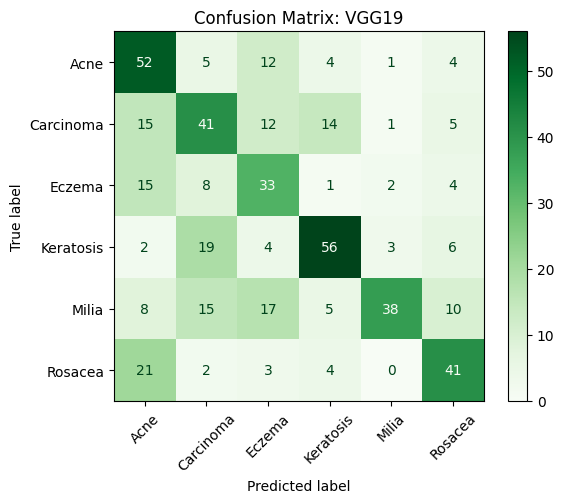

In [34]:

# Evaluation
y_pred_vgg19 = np.argmax(vgg19_model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_vgg19, target_names=categories))

# Confusion matrix (correct way)
cm_vgg19 = confusion_matrix(y_test, y_pred_vgg19)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vgg19, display_labels=categories)
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title('Confusion Matrix: VGG19')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

# Predictions for VGG19
y_pred_vgg19 = np.argmax(vgg19_model.predict(X_test), axis=1)

# Calculate and print accuracy
accuracy_vgg19 = accuracy_score(y_test, y_pred_vgg19)
print(f"VGG19 Accuracy: {accuracy_vgg19 * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step
VGG19 Accuracy: 54.04%


In [15]:
# Step 2: Load MobileNet base
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False  # Freeze base model layers

# Step 3: Add custom classifier
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(categories), activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=predictions)

# Step 4: Compile with categorical loss
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',  # Changed here
                        metrics=['accuracy'])

# Step 5: Train with one-hot encoded labels
print("Training MobileNet...")
history_mobilenet = mobilenet_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.1)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training MobileNet...
Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.2792 - loss: 1.7872 - val_accuracy: 0.4794 - val_loss: 1.4215
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4812 - loss: 1.3910 - val_accuracy: 0.5876 - val_loss: 1.1917
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6005 - loss: 1.1729 - val_accuracy: 0.6392 - val_loss: 1.0434
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6631 - loss: 0.9760 - val_accuracy: 0.6701 - val_loss: 0.9414
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7161 - loss: 0.8719 - val_accuracy: 0.7010 - val_loss: 0.8618
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7314 - loss: 0.8181 - val_accuracy: 0.7165 - val_loss: 0.8054
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7576 - loss: 0.7508 - val_accuracy: 0.7216 - val_loss: 0.7543
Epoch 8/50
109/109 ━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step
              precision    recall  f1-score   support

        Acne       0.78      0.82      0.80        78
   Carcinoma       0.93      0.93      0.93        88
      Eczema       0.76      0.89      0.82        63
   Keratosis       0.96      0.96      0.96        90
       Milia       0.95      0.89      0.92        93
     Rosacea       0.89      0.77      0.83        71

    accuracy                           0.88       483
   macro avg       0.88      0.88      0.88       483
weighted avg       0.89      0.88      0.88       483



<Figure size 1000x800 with 0 Axes>

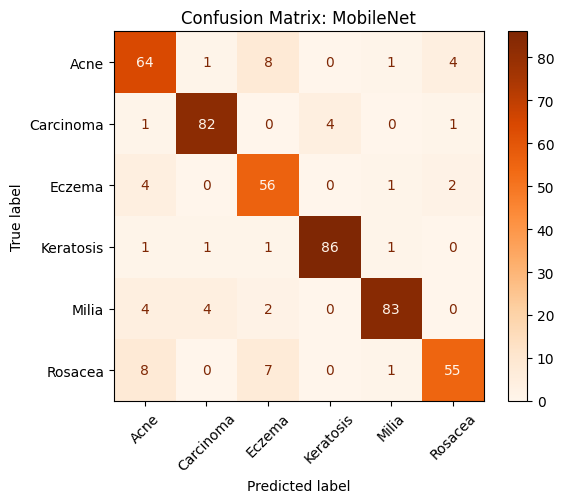

In [16]:
# Evaluation
y_pred_mobilenet = np.argmax(mobilenet_model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_mobilenet, target_names=categories))

cm_mobilenet = confusion_matrix(y_test, y_pred_mobilenet)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mobilenet, display_labels=categories)
disp.plot(cmap='Oranges', xticks_rotation=45)
plt.title('Confusion Matrix: MobileNet')
plt.show()

In [17]:
accuracy_mobilenet = accuracy_score(y_test, y_pred_mobilenet)
print(f"MobileNet Accuracy: {accuracy_mobilenet * 100:.2f}%")


MobileNet Accuracy: 88.20%


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
ResNet50 Accuracy: 34.78%
VGG19 Accuracy: 54.04%
MobileNet Accuracy: 88.20%


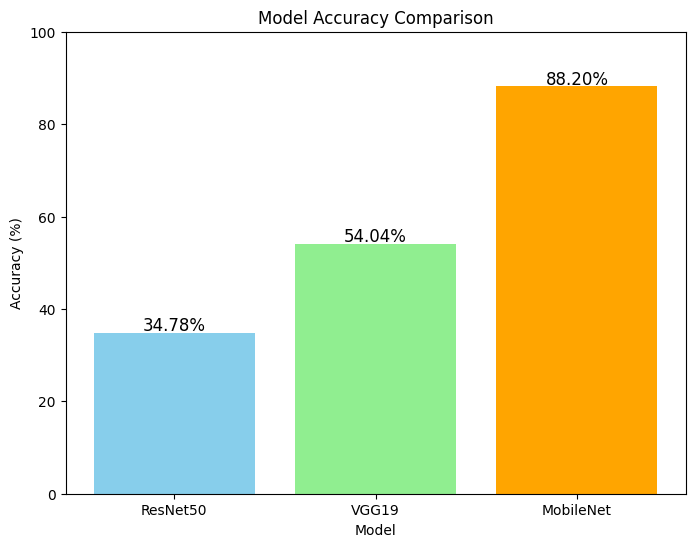

In [33]:
# Predictions
y_pred_resnet = np.argmax(resnet_model.predict(X_test), axis=1)
y_pred_vgg19 = np.argmax(vgg19_model.predict(X_test), axis=1)
y_pred_mobilenet = np.argmax(mobilenet_model.predict(X_test), axis=1)

# Compute accuracies
accuracy_resnet = accuracy_score(y_test, y_pred_resnet) * 100
accuracy_vgg19 = accuracy_score(y_test, y_pred_vgg19) * 100
accuracy_mobilenet = accuracy_score(y_test, y_pred_mobilenet) * 100

# Print the accuracies
print(f"ResNet50 Accuracy: {accuracy_resnet:.2f}%")
print(f"VGG19 Accuracy: {accuracy_vgg19:.2f}%")
print(f"MobileNet Accuracy: {accuracy_mobilenet:.2f}%")

# Plot comparison
models = ['ResNet50', 'VGG19', 'MobileNet']
accuracies = [accuracy_resnet, accuracy_vgg19, accuracy_mobilenet]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add accuracy values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 100)
plt.show()


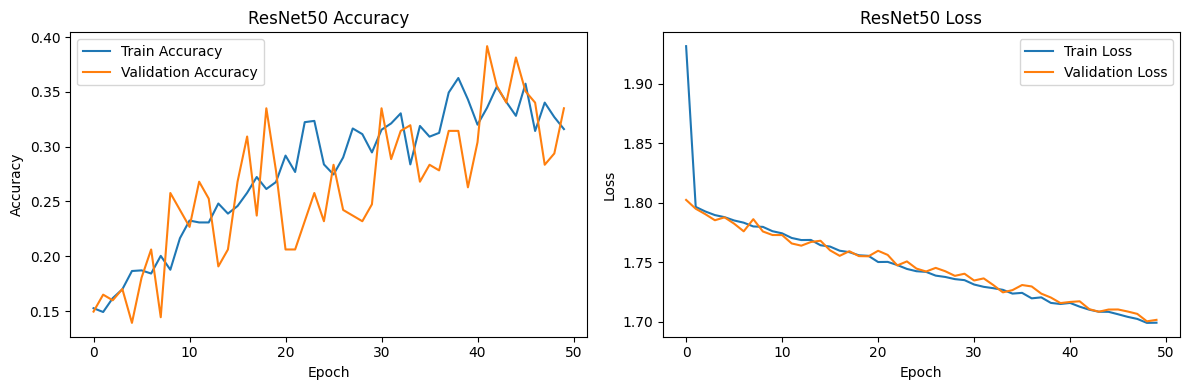

In [32]:
# ResNet50 Accuracy and Loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


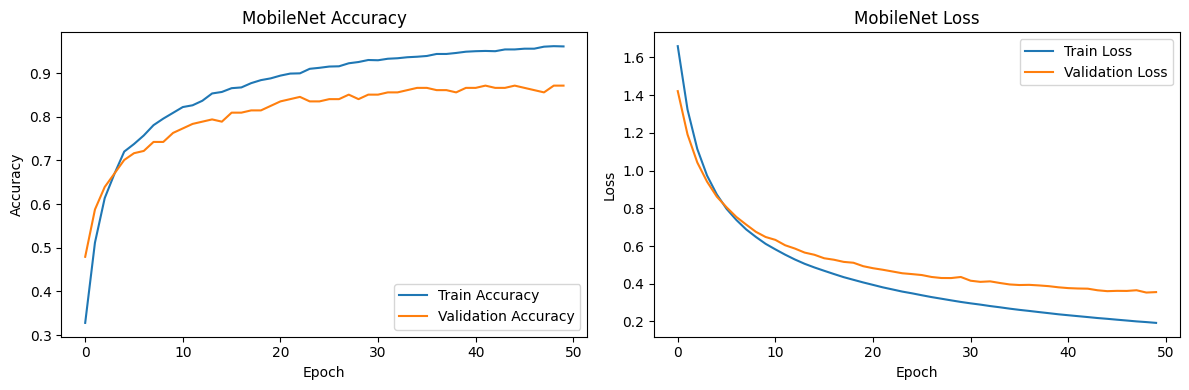

In [25]:
#mobilenet

# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


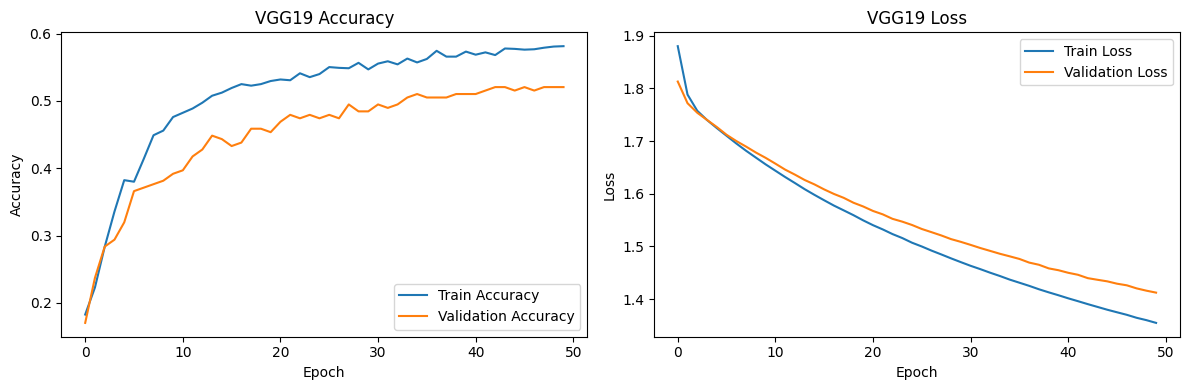

In [26]:
#vgg19

# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['loss'], label='Train Loss')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss')
plt.title('VGG19 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
